# This dataset is focus on hyperparameter tuning and at the end there is an example with multivariate forecasting
- In fuzzy time series, what are the different parameter that we can tune? 
- How to assess the performance per combination of parameter? 
- What is the effect of the number of partition on the performance of the model? 
- At what point are we overfitting by increasing the # of partitions? 
- What is the effect of order on the performance and complexity of the model? 
- How can we deal with the effect of 0 in the series.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/Users/philippebeliveau/Desktop/Bureau/Notebook_Jupyter_R/datah-m1-challange/sales.csv")

In [5]:
df.head()

,DATE,S100,I100,C100,C101,QTT
0,2017-01-08,0,0,12,76,2
1,2017-01-08,0,0,12,149,3
2,2017-01-08,0,0,12,256,3
3,2017-01-08,0,0,12,354,3
4,2017-01-08,0,0,13,149,2


In [6]:
df.shape[0]

2749369

Starts in 2017 and end in 2021

<function matplotlib.pyplot.show(close=None, block=None)>

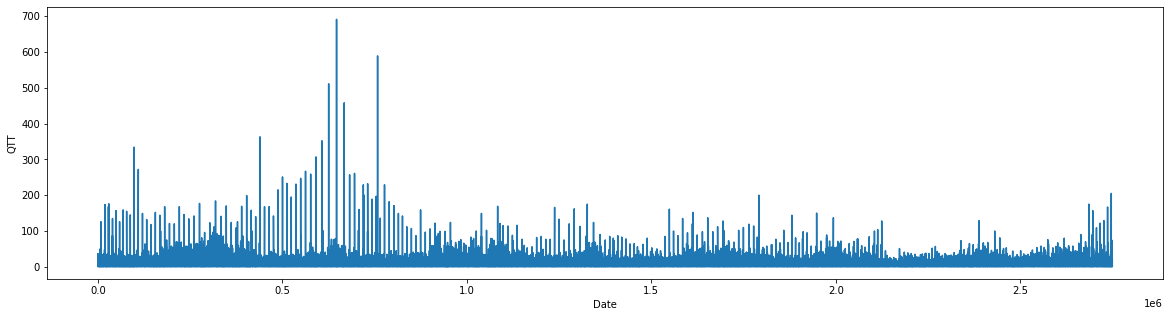

In [6]:
plt.figure(figsize=(20,5))
plt.plot(df["QTT"])

plt.xlabel("Date")
plt.ylabel("QTT")
plt.show

## Number of zeros

In [7]:
df.eq(0).sum()

DATE        0
S100    99850
I100     8841
C100     6601
C101       89
QTT         0
dtype: int64

## Transformation
We can use pyFTS own transformations tool. Although, I am not sure how are we going to integrate our own transformation in the partionning function.

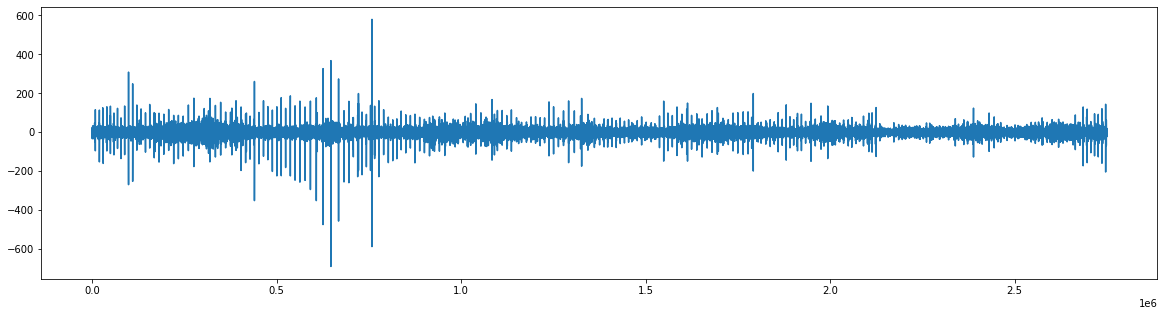

In [8]:
from pyFTS.common import Transformations

diff = Transformations.Differential(1)
fig = plt.subplots(figsize=(20,5))
plt.plot(diff.apply(df["QTT"].values), label="QTT")
pass

# Train test split
Only the training data seems to be partionned. 

### Smaller set

In [6]:
train = df.iloc[:300000]
test = df.iloc[300001:400000]

uni_train = train["QTT"].values
multi_train = train.values

uni_test = test['QTT'].values
multi_test = test.values

### Full set

In [10]:
train = df.iloc[:2000000]
test = df.iloc[2000001:2749369]

uni_train = train["QTT"].values
multi_train = train.values

uni_test = test['QTT'].values
multi_test = test.values

# Statistic

In [ ]:
from statsmodels.tsa.stattools import adfuller
rows = []
result = adfuller(uni_train)
rows.append([result[0], result[1], result[2], result[3], result[4]])
pd.DataFrame(rows,columns=['ADF Statistic','p-value','Cr. Val. 1%','Cr. Val. 5%','Cr. Val. 10%'])

# Training phase

## Step 1 - Universe of Discourse partitioning: 
partitioning is the most significant part of training phase. It is applied
to split the Universe of Discourse U into fuzzy sets by making linguistic values A˜ through various types of
available techniques in the literature.

In [9]:
from pyFTS.common import Util
from pyFTS.benchmarks import Measures
from pyFTS.partitioners import Grid,  Entropy #, Huarng
from pyFTS.models import hofts
from pyFTS.common import Membership as mf
from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.data import Enrollments

## Hyperparameter in the training phase
#### Data partitioning
Creation of A˜ (partitions) strongly depends on three hyperparameters: the number of partitions, the partitioning
techniques and membership function µ.

#### Partioning technique
The partitioning methods are commonly divided into two groups according to the length or size of intervals: fixed (equal)
intervals and unequal interval techniques as illustrated in Figure 2.
In an equal-sized partitioning technique the length of generated fuzzy sets are equal. Due to its main advantages, which are
simplicity and not being time consuming, it has been adopted by numerous scientists [13–27]. Grid partitioning proposed in [8]
is known as the simplest partitioning scheme. Considering k as the number of intervals, then in Grid partitioning method, k fuzzy
sets with the same size will be created by splitting U into k overlapping fuzzy sets. Some works in the literature used simple
heuristic partitioning methods, including [28–32].

#### The Number of Partitions k
Another parameter that has a strong effect on the accuracy of the model is the number of fuzzy sets. Choosing a large value for k increases the complexity of the model because too many
fuzzy sets and rules are generated, perhaps more than the required number. This factor has effect on the readability and explainability of the model [83].

#### The Membership Function
The membership function specifies the degree in [0, 1] to which a crisp value belongs to a fuzzy set. Although the influence on
the accuracy is less important than other parameters, it is recommended to test different fuzzy sets in the model. Trapezoidal,
Triangular and Gaussian are the most common ones. 

#### Parameters 
data: the time series training data;
* npart: the minimum number of partitions/fuzzy sets;
* mf: the membership function that will be used, which by default is triangular (trimf). The various membership
functions can be found in pyFTS.common.Membership;
* transformation: if any transformation is used in the series, it must be informed.

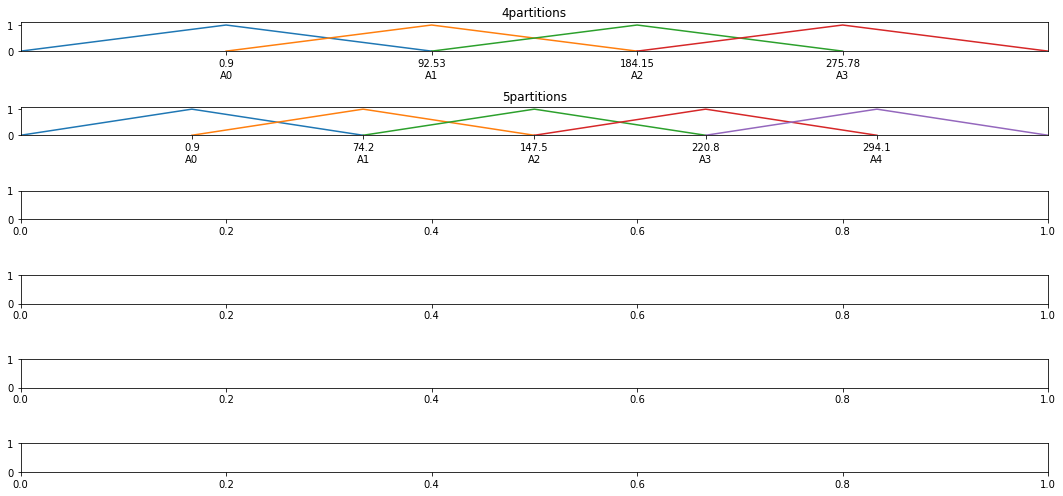

In [10]:
fig, ax = plt.subplots(nrows=6, ncols=1,figsize=[15,7])

for ct, npart in enumerate(np.arange(4, 6, 1)):
  part = Grid.GridPartitioner(data=uni_train, npart=npart, mf=[mf.gaussmf])
  part.name = str(npart) + "partitions"
  
  part.plot(ax[ct], rounding=2)
 
plt.tight_layout()

## Exploring the partitioning effects on transformed data
If you want to see the manifold of the error given the number of partitions, check this notebook
https://github.com/PYFTS/notebooks/blob/master/Severiano_et_al_HighOrderFTS.ipynb

# Hyper-1: Finding the best number of partitions
https://github.com/PYFTS/notebooks/blob/master/Partitioners.ipynb
Here we are using a Gridpartiotioner. Thus it will divide the Universe of discourse in equal length. 

Other techniques could be use to partition U, such as: 
- Entropy
- C-means
- Kmeans
- etc

All of those techniques can be easily implemented by simply changing the Grid.GridPartitioner for Grid.GridPartitioner, CMeans.CMeansPartitioner, 
                                                           FCM.FCMPartitioner, Entropy.EntropyPartitioner,
                                                           Huarng.HuarngPartitioner

What could also be tested in the partitioner hyperparameter tuning is the membership function. 
- Gaussian 
- Triangular
- Trapezoid



In [ ]:
diff = Transformations.Differential(1)
fig = plt.subplots(figsize=(20,5))
plt.plot(diff.apply(uni_train), label="QTT")
pass

In [ ]:
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures
rows = []


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(uni_test, label='QTT',color='black')

for npart in np.arange(5, 25, 5):
  part = Grid.GridPartitioner(data=uni_train, npart=npart,  transformation=diff)
  model = hofts.HighOrderFTS(order=1, partitioner=part)
  model.append_transformation(diff)  
  model.fit(uni_train)
  forecasts = model.predict(uni_test)
    
  ax.plot(forecasts[:-1], label=str(npart) + " partitions")
  
  rmse, mape, u = Measures.get_point_statistics(uni_test, model)
  
  rows.append([npart, rmse, mape, u])
  

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

pd.DataFrame(rows, columns=['Partitions','RMSE','MAPE','U'])

In [ ]:
print(model)

# Hyper-2 : Order

The order is the antecedent. How many linguistic variable do you want to use to generated the consequent? 

#### Question? 
- Does increasing the order increase the complexity of the model and thus tend to overfit? 
- Does increasing the order decrease the level of interpretability? 

In [ ]:
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures
rows = []

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(uni_test, label='QTT',color='black')

for order in np.arange(1,4):
  part = Grid.GridPartitioner(data=uni_train, npart=5, transformation=diff)
  model = hofts.HighOrderFTS(order=order, partitioner=part)
  model.append_transformation(diff)  
  model.fit(uni_train)
  forecasts = model.predict(uni_test)
  if order > 1:
    for k in np.arange(order):
      forecasts.insert(0,None)

  ax.plot(forecasts[:-1], label=str(order) + " order")
  
  rmse, mape, u = Measures.get_point_statistics(uni_test, model)
  
  rows.append([order, rmse, mape, u])
  

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

pd.DataFrame(rows, columns=['Order','RMSE','MAPE','U'])
     

# Hyper-3 : Method

The method refers to the model use to generate the Fuzzy rule relation. And take care of the deffuzification. Generation of Fuzzy Rules: In this step the temporal transition rules are created. These rules depends on the method and their characteristics

An example of such a model is the Weighted rule model. 

The occurrence of temporal patterns in the historical data when building the FLRG is one of the issues which has been ignored
by researchers [13, 28, 93, 94, 99], which means that the importance of recurrent and unique patterns of data in forecasting is the
same.

In terms of defuzzification within the forecasting procedure, the weighted rule models [148] the weight of each fuzzy rule with respect to the input observations are determined and the predicted value obtained through these weights.

In Chen's model, the defuzzication process is done in a different way:
1. If the consequence or RHS of the rule is empty, then the yˆ(t + 1) is the midpoint of the fuzzy set f(t), corresponding to a na¨ıve forecast.
2. If the RHS in FLR consists of only one fuzzy set, yˆ(t + 1) is the midpoint of the corresponding fuzzy set.
3. Otherwise, the value of yˆ(t + 1) is the mean value of midpoints of those fuzzy sets in the RHS.
 https://www.researchgate.net/publication/220231471_Forecasting_Enrollments_Based_on_High-Order_Fuzzy_Time_Series

Other family of method that can be tested are: 
- Hybrid Method with Statistical Models -> Fuzzy ARIMA, Seasonal Auto Regressive Fractionally Integrated Moving Average (SARFIMA)

- Matrix and Rule-based Models
- Feed forward neural network can be used to determine fuzzy relations.
- from pyFTS.models import ismailefendi (Improved Weighted model) https://github.com/PYFTS/notebooks/blob/master/Ismail%20%26%20Efendi%20-%20ImprovedWeightedFTS.ipynb

In [ ]:
from pyFTS.models import hofts, pwfts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures
rows = []

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(uni_test, label='QTT',color='black')

part = Grid.GridPartitioner(data=uni_train, npart=5, transformation=diff)

for method in [hofts.HighOrderFTS, hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS]:
  model = method(order=1, partitioner=part)
  model.append_transformation(diff)  
  model.fit(uni_train)
  forecasts = model.predict(uni_test)

    
  ax.plot(forecasts[:-1], label=model.shortname)
  
  rmse, mape, u = Measures.get_point_statistics(uni_test, model)
  
  rows.append([model.shortname, rmse, mape, u])
  

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

pd.DataFrame(rows, columns=['Model','RMSE','SMAPE','U'])

# Effect of transformation

In [ ]:
from pyFTS.models import chen
from pyFTS.partitioners import Grid

part1 = Grid.GridPartitioner(data=uni_train, npart=10, transformation=diff)
part2 = Grid.GridPartitioner(data=uni_train, npart=10)

model1 = pwfts.ProbabilisticWeightedFTS(partitioner=part1)
model1.append_transformation(diff)
model1.fit(uni_train)

model2 = pwfts.ProbabilisticWeightedFTS(partitioner=part2)
model2.fit(uni_train)

forecasts1 = model1.predict(uni_test)
forecasts2 = model2.predict(uni_test)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(uni_test, label='Original')
ax.plot(forecasts1, label='With transformation')
ax.plot(forecasts2, label='Without transformation')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
     

In [ ]:
print(model2)

### Without transformation

In [ ]:
rows = []
rmse, smape, u = Measures.get_point_statistics(uni_test, model2)
  
rows.append([model2.shortname, rmse, smape, u])
pd.DataFrame(rows, columns=['Model','RMSE','SMAPE','U'])

### With transformation

In [ ]:
rows = []
rmse, smape, u = Measures.get_point_statistics(uni_test, model1)
  
rows.append([model1.shortname, rmse, smape, u])
pd.DataFrame(rows, columns=['Model','RMSE','SMAPE','U'])